# <font color = Crimson size = 6> <b>Регрессионный анализ. <br> Парная (однофакторная) линейная регрессия</b> </font>

Если **корреляционный анализ** помогает нам оценить тесноту связи, то **регрессионный анализ** может ответить на вопрос, как именно изменяется зависимая переменная $y$ при изменении независимой переменной $x$. Регрессионный анализ помогает нам подобрать математическую модель определенного типа, с помощью которой мы опишем изменение зависимой переменной $y$ при изменении независимой переменной $x$.

In [1]:
from math import log10
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

#from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

***
## <font color = DarkGreen size = 5> <b>Уравнение линейной регрессии</b> </font>

Если признак один, то такая линейная регрессия называется **парной**. Она описывает связь признака $x$ с результирующей $y$. В основе математической модели, описывающей эту зависимость, лежит предположение, что зависимость выражена следующим образом:

$$Y = A + B X + e$$
$Y$ — зависимая переменная (отклик, исход) \
$X$ — независимая переменная (предиктор, признак) \
$A$ — свободный член (intercept) \
$B$ — коэффициент регрессии (угловой коэффициент) \
$e$ — остатки (случайная ошибка)
<br><br>

Подогнанные значения (предсказанные значения) $\hat{y}$ задаются формулой:

$$\hat{y_i} = \beta_0 + \beta_1 x_i$$
$\beta_0, \beta_1$ — оценочные коэффициенты
<br><br>

Остатки $\hat{e_i}$ вычисляются путем вычитания предсказанных значений из исходных данных:

$$\hat{e_i} = y_i - \hat{y_i}$$

***
### <font color = MediumBlue size = 4> <b>Диаграмма рассеяния</b> </font>

**Диаграмма рассеяния** – это множество точек $(x_i;y_i)$ в декартовой системе координат, абсциссы $x_i$ которых соответствуют значениям признака-фактора $X$, а ординаты $y_i$ – соответствующим значениям признака-результата $Y$.

##### <font color = SlateBlue size = 3> Пример </font>

**Имеются выборочные данные по 8ми студентам, где $X$ – количество прогулов за некоторый период времени, $Y$ – суммарная успеваемость за этот период.**

In [2]:
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

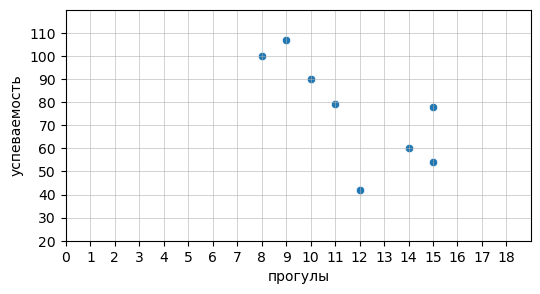

In [6]:
plt.figure(figsize=(6,3))

sns.scatterplot(x='X', y='Y', data=df)

plt.xlim([0,19])
plt.xticks(ticks=np.arange(0, 19))
plt.ylim([20,120])
plt.yticks(ticks=np.arange(20, 120, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

***
### <font color = MediumBlue size = 4> <b>Метод наименьших квадратов</b> </font>

Оптимальная прямая $y = a + bx$, которая проходит максимально близко к эмпирическим точкам. \
Обычно её находят **методом наименьших квадратов** – это метод нахождения оптимальных параметров линейной регрессии, таких, что сумма квадратов ошибок (остатков) была минимальна.

$\hat{y} = \beta_0 + \beta_1 x_i$

$\beta_1 = r \cfrac{\sigma_y}{\sigma_x}$ – **коэффициент регрессии** $Y$ на $X$\
$\beta_0 = m_y - r \cfrac{\sigma_y}{\sigma_x} m_x = m_y - \beta_1 m_x$ – **интерсепт**

In [7]:
X = df['X'].values
Y = df['Y'].values
n = X.shape[0]

In [8]:
Mx, My, SDx, SDy = X.mean(), Y.mean(), X.std(), Y.std()
r = np.corrcoef(X,Y)[0,1]

b1 = r * SDy / SDx
b0 = My - b1 * Mx
b0, b1

(147.3203883495146, -6.048543689320389)

#### <font color = SteelBlue size = 3> <b>Функция потерь</b> </font>

В основе метода линейной регрессии лежит метод наименьших квадратов. Т.е. коэффициенты подбираются таким образом, чтобы минимизировать среднюю квадратичную ошибку, которая находится по формуле: \
$mse = \cfrac{\sum{(y-\hat{y})^2}}{n}$

$\sigma_y^2(1-r^2)$ – **остаточная дисперсия** случайной величины $Y$ относительно случайной величины $X$ \
(характеризует величину ошибки, которую допускают при замене $Y$ линейной функцией $\hat{Y} = \beta_0 + \beta_1 X$).

[Метод наименьших квадратов](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/PT_04_System%20of%20two%20random%20variables.ipynb)

***
### <font color = MediumBlue size = 4> <b>Матричный метод</b> </font>

Чтобы решить матричным методом уравнение вида $\hat{y} = \beta_0 + \beta_1 x_i$, нам нужно представить это уравнение в матричном виде.\
Матрица $Y$ равна произведению матрицы $X$ и матрицы $B$: \
$Y = X \cdot B$

$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \\ \end{pmatrix}$ = 
$\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \ldots \\ 1 & x_n \\ \end{pmatrix}$
$\begin{pmatrix} \beta_0 \\ \beta_1 \\ \end{pmatrix}$

$B = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$

Матричный метод мы также можем использовать и при многомерном анализе. Тогда у нас будет больше столбцов (признаков) в матрице $X$ и, соответственно, матрица $B$ даст больше коэффициентов.

Если по какой-то причине мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.

In [9]:
X = df['X'].values
X = np.hstack([np.ones((n,1)), X.reshape((-1,1))])

In [10]:
Y = df['Y'].values
Y = Y.reshape((-1,1))

In [11]:
B = np.linalg.inv(X.T @ X) @ (X.T @ Y)
B

array([[147.32038835],
       [ -6.04854369]])

***
### <font color = MediumBlue size = 4> <b>Метод градиентного спуска</b> </font>

Градиентом функции многих переменных в данной точке называется вектор, координаты которого равны частным производным по соответствующим аргументам, вычисленным в данной точке.

Рассмотрим функцию двух переменных $f(x, y)$. Градиентом функции f(x, y) будет вектор $\nabla{f} = \left(\cfrac{df}{dx}, \cfrac{df}{dy}\right)$. Производные $\cfrac{df}{dx}$ и $\cfrac{df}{dy}$ вычисляются в каждой точке $(x, y)$. Таким образом, градиент задан в каждой точке и будет меняться от точки к точке.

В данной точке градиент будет показывать нам направление наибольшего возрастания функции. Модуль градиента совпадает с максимальной скоростью возрастания функции в данной точке. Когда у нас есть две переменные, то наш двухкомпонентный градиент
может указать направление наибольшего возрастания функции на плоскости. Аналогично с тремя переменными – градиент может указать направление наибольшего возрастания функции в трехмерном пространстве.
<br><br>

Функция, для которой мы будем искать экстремум, в машинном обучении называется **целевой функцией (objective function)**. Задача по нахождению экстремума функции называется задачей оптимизации. Если речь идет о поиске минимума, то употребляют термины **функция стоимости (cost function)**, **функция потерь (loss function)**, **функция ошибок (error function)**.

Если функция дифференцируема, то найти точки, подозрительные на экстремум, можно с помощью необходимого условия экстремума: все частные производные должны равняться нулю, а значит, вектор градиента – нулевому вектору. Но не всегда задачу можно решать аналитически. В таком случае используется численная оптимизация. Наиболее простым в реализации из всех методов численной оптимизации является метод градиентного спуска.

**Градиентный спуск** – итерационный метод. Основная идея градиентного спуска состоит в том, чтобы двигаться к минимуму в направлении наиболее быстрого убывания функции потерь, которое определяется антиградиентом. В ходе градиентного спуска мы итеративно применяем следующее правило обновления: \
$w^t = W^{t-1} - \eta \cdot \nabla{Q(w^{t-1})}$, где \
$\nabla{Q(w^{t-1})}$ – это градиент функции потерь, которую мы пытаемся минимизировать, \
$\eta$ — размер шага градиентного спуска, называемый **темпом обучения**, или **скоростью обучения (learning rate)**.

Мы выбираем каким-либо способом начальную точку, вычисляем в ней градиент рассматриваемой функции и делаем небольшой шаг в обратном, антиградиентном направлении. В результате приходим в точку, в которой значение функции будет меньше первоначального. В новой точке повторяем процедуру: снова вычисляем градиент функции и делаем шаг в обратном направлении. Продолжая этот процесс, мы будем двигаться в сторону убывания функции.

Важно, чтобы наша функция была выпуклой и гладкой. Гладкой или непрерывно дифференцируемой функцией называют функцию, имеющую непрерывную производную на всем множестве определения. Выпуклой (или выпуклой вниз) функцией называют функцию, для которой отрезок между любыми двумя точками ее графика в векторном пространстве лежит не ниже соответствующей дуги графика. Выпуклость гарантирует существование лишь одного минимума, а гладкость – существование вектора градиента в каждой точке.

<img src="./img/st_10_image1.jpg" width="500"/>
<br><br>

***
Наша функция линейной регрессии – это прямая $y = a + bx$, которая проходит максимально близко к эмпирическим точкам.

Необходимо минимизировать функцию:\
$\displaystyle F(a,b) = \sum_{i=1}^{n}{(a + b x_i -y_i)^2}$

Для отыскания минимума нужны частные производные: \
$\displaystyle \cfrac{\partial{F}}{\partial{a}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)x_i}$ \
$\displaystyle \cfrac{\partial{F}}{\partial{b}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)}$

In [12]:
# функция потерь
def mse(a, b, x, y, n):
    return np.sum((a + b*x - y)**2)

# частная производная функции потерь по a
def mse_pa(a, b, x, y, n):
    return 2 * np.sum((a + b*x) - y)

# частная производная функции потерь по b
def mse_pb(a, b, x, y, n):
    return 2 * np.sum(((a + b*x) - y)*x)

In [13]:
X = df['X'].values
Y = df['Y'].values

In [14]:
alpha = 1e-5
a = 0
b = 0
mse_min = mse(a,b,X,Y,n)

for i in range(2*10**6):
    a -= alpha * mse_pa(a,b,X,Y,n)
    b -= alpha * mse_pb(a,b,X,Y,n)
    if not i%(1*10**5):
        print(f'{i}: {a = } {b = } mse = {mse(a, b, X, Y, n)}')
    if mse(a,b,X,Y,n) > mse_min:
        print(f'Достигнут минимум {i_min}: a = {a_min} b = {b_min} mse = {mse_min}')
        break
    else:
        mse_min = mse(a,b,X,Y,n)
        i_min, a_min, b_min = i, a, b

0: a = 0.0122 b = 0.13709706400000002 mse = 48281.28441430877
100000: a = 74.9995314663167 b = -0.16602164745538592 mse = 3621.470641785071
200000: a = 111.70124260686227 b = -3.15131018056983 mse = 2209.554336601415
300000: a = 129.77740561791794 b = -4.621611168798081 mse = 1867.0636025618114
400000: a = 138.68019676983243 b = -5.34575725116323 mse = 1783.985092545101
500000: a = 143.06495974448737 b = -5.702410448572362 mse = 1763.8326091619897
600000: a = 145.2245236403238 b = -5.878067690003988 mse = 1758.944189925492
700000: a = 146.28814241451045 b = -5.964581610786184 mse = 1757.758398468552
800000: a = 146.81199118739949 b = -6.007191061032344 mse = 1757.4707591906324
900000: a = 147.0699948476535 b = -6.028176877347788 mse = 1757.400986083635
1000000: a = 147.19706565921268 b = -6.0385127179626386 mse = 1757.3840611125552
1100000: a = 147.25965000834384 b = -6.0436032800647235 mse = 1757.3799555959972
1200000: a = 147.29047377273318 b = -6.046110460997692 mse = 1757.378959714

***
### <font color = MediumBlue size = 4> <b>Модель ML (sklearn)</b> </font>

In [15]:
X = df[['X']].values
y = df['Y'].values

In [16]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

a = reg.intercept_
b = reg.coef_[0]
a,b

(147.3203883495146, -6.048543689320389)

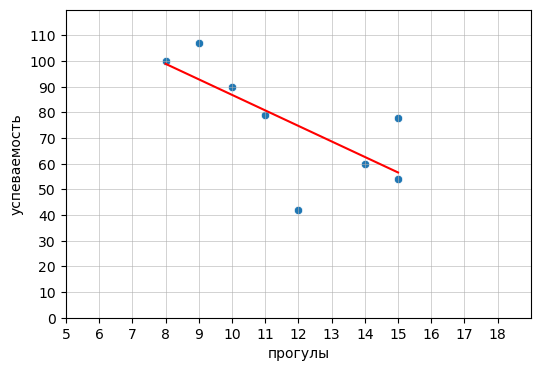

In [20]:
plt.figure(figsize=(6,4))

sns.scatterplot(x='X', y='Y', data=df)
sns.lineplot(x=df.X, y=y_pred, color ='r')

plt.xlim([5,19])
plt.xticks(ticks=np.arange(5, 19))
plt.ylim([0,120])
plt.yticks(ticks=np.arange(0, 120, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

Уравнение регрессии аппроксимирует (приближает) эмпирические данные (точки), и с помощью него можно интерполировать (оценить) неизвестные промежуточные значения.

Очевидно, что чем ближе эмпирические точки к прямой, тем теснее линейная корреляционная зависимость – тем уравнение регрессии достовернее отражает ситуацию, и тем качественнее полученная модель. И наоборот, если многие точки разбросаны вдали от прямой, то признак $Y$ зависит от $X$ вовсе не линейно (если вообще зависит) и линейная функция плохо отражает реальную картину.

***
## <font color = DarkGreen size = 5> <b>Условия применимости линейной регрессии</b> </font>

***
### <font color = MediumBlue size = 4> <b>1. Наличие линейной зависимости между зависимой и независимой переменной</b> </font>

<img src="./img/st_10_image3.png" width=""/>

***
### <font color = MediumBlue size = 4> <b>2. Независимость остатков</b> </font>

<img src="./img/st_10_image4.png" width=""/>

In [21]:
e = df.Y.values - y_pred

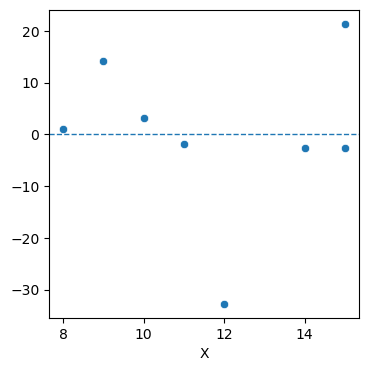

In [22]:
plt.figure(figsize=(4,4))

sns.scatterplot(x=df.X, y=e)
plt.axhline(0, linestyle='--', linewidth = 1);

***
### <font color = MediumBlue size = 4> <b>3. Остатки долны быть нормально распределены</b> </font>

<img src="./img/st_10_image5.png" width=""/>

In [23]:
stats.shapiro(e)

ShapiroResult(statistic=0.8757836818695068, pvalue=0.17155571281909943)

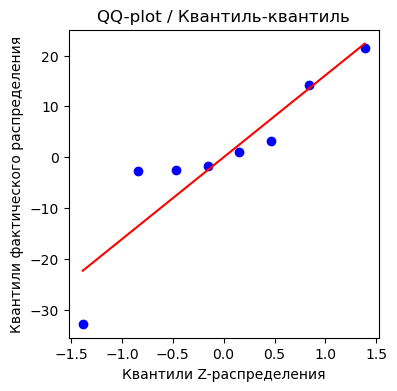

In [24]:
plt.figure(figsize = (4, 4))

stats.probplot(e, dist="norm", plot=plt)

plt.title('QQ-plot / Квантиль-квантиль')
plt.xlabel('Квантили Z-распределения')
plt.ylabel('Квантили фактического распределения');

***
### <font color = MediumBlue size = 4> <b>4. Гомоскедастичность</b> </font>

Под этим свойством понимается постоянство дисперсии при всех значениях $x$.

Одинаковая изменчивость зависимой переменной на всех уровнях независимой переменной (постоянная изменчивость остатков).

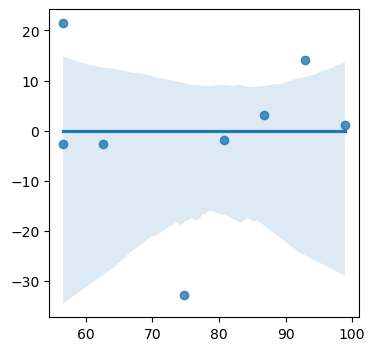

In [25]:
plt.figure(figsize = (4, 4))

sns.regplot(x = y_pred, y = e);

***
## <font color = DarkGreen size = 5> <b>Показатели влияния фактора на результат</b> </font>

***
### <font color = MediumBlue size = 4> <b>Линейный коэффициент корреляции</b> </font>

**Линейный коэффициент корреляции** – это частный аналог [эмпирического корреляционного отношения](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_08_Grouping%20data.%20Correlation%20analysis.ipynb). Но в отличие от отношения, он показывает не только тесноту, но ещё и направление зависимости, ну и, конечно, здесь определена её форма (линейная). Позволяет оценить тесноту линейной корреляционной зависимости – насколько близко расположены точки к построенной прямой.

#### <font color = SteelBlue size = 3> <b>Выборочный линейный коэффициент парной корреляции Пирсона</b> </font>

**Коэффициентом корреляции** $r_{xy}$ случайных величин $X$ и $Y$ называют отношение корреляционного момента к произведению  
средних квадратических отклонений этих величин: \
$r_{xy} = \cfrac{cov_{xy}}{\sigma_x \sigma_y}$, где 
$cov_{xy} = M(XY) - M(X)M(Y)$ - [ковариация (корреляционный момент)](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/PT_04_System%20of%20two%20random%20variables.ipynb) $X$ и $Y$

In [26]:
X = df['X'].values
Y = df['Y'].values

In [27]:
m = np.mean(X*Y) - np.mean(X) * np.mean(Y)
SDx = np.std(X)
SDy = np.std(Y)
r = m / (SDx * SDy)
r

-0.7193069877978744

In [28]:
np.corrcoef(X, Y)

array([[ 1.        , -0.71930699],
       [-0.71930699,  1.        ]])

#### <font color = SteelBlue size = 3> <b>Выборочный коэффициент ранговой корреляции Спирмена </b></font>

Допустим, что объекты генеральной совокупности обладают двумя качественными признаками.

>Под качественным подразумевается признак, который невозможно измерить точно, но он позволяет сравнивать объекты между собой и, следовательно, расположить их в порядке убывания или возрастания качества. Для  определенности будем всегда располагать объекты в порядке ухудшения качества. При таком «ранжировании» на первом месте находится объект наилучшего качества по сравнению с остальными; на втором месте окажется объект «хуже» первого, но «лучше» других и т.д.

Пусть выборка объема $n$ содержит независимые объекты, которые обладают двумя качественными признаками $A$ и $B$. Для оценки 
степени связи признаков вводят, в частности, коэффициенты ранговой корреляции Спирмена и Кендалла.

Расположим сначала объекты выборки в порядке ухудшения качества по признаку $A$ при допущении, что **все объекты имеют различное качество по обоим признакам**.

Припишем объекту, стоящему на $i$-м месте, число — ранг $x_i$, равный порядковому номеру объекта. Расположим теперь объекты в порядке убывания качества по признаку $B$ и припишем каждому из них ранг $y_i$, равный порядковому номеру объекта.

В итоге получим две последовательности рангов: \
$A: x_1, x_2, \ldots, x_n$ \
$B: y_1, x_y, \ldots, y_n$

$r = 1 - \cfrac{6 \cdot \sum{(x_i-y_i)^2}}{n^3-n}$

> К недостатку рангового коэффициента корреляции Спирмена можно отнести тот факт, что он практически ничего не говорит о форме зависимости.

In [29]:
X = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
Y = np.array([27, 37, 42, 48, 57, 56, 77, 80])

In [30]:
n = X.shape[0]
df = pd.DataFrame({'X': X, 'Y': Y})
df['Xr'] = df['X'].rank()
df['Yr'] = df['Y'].rank()
df

,X,Y,Xr,Yr
0,1.2,27,1.0,1.0
1,1.6,37,2.0,2.0
2,1.8,42,3.5,3.0
3,1.8,48,3.5,4.0
4,2.5,57,5.0,6.0
5,2.6,56,6.0,5.0
6,3.0,77,7.0,7.0
7,3.3,80,8.0,8.0


In [31]:
1 - 6 * sum((df['Xr']-df['Yr'])**2)/(n**3-n)

0.9702380952380952

In [32]:
np.corrcoef(df['Xr'], df['Yr'])

array([[1.        , 0.97007727],
       [0.97007727, 1.        ]])

In [33]:
stats.spearmanr(X, Y)

SpearmanrResult(correlation=0.9700772721497398, pvalue=6.548558831120599e-05)

***
**Коэффициент корреляции безразмерен и принимает значения из промежутка: $-1\leq r_{xy} \leq 1$.**

Чем ближе $r_{xy}$ *по модулю* к $1$, тем теснее линейная взаимосвязь между величинами $X$ и $Y$.

Чем ближе $r_{xy}$ *по модулю* к $0$ – тем такая зависимость выражена меньше.

Крайним значениям $r_{xy}=-1$ и $r_{xy}=1$ соответствует строгая функциональная зависимость $y = a + bx$

Для оценки тесноты связи можно использовать шкалу Чеддока:
<img src="./img/st_10_image2.png" width=""/>

***
Если $r<0$, то корреляционная связь **обратная**, а если $r>0$, то **прямая**.

***
### <font color = MediumBlue size = 4> <b>Коэффициент детерминации</b> </font>

**Коэффициент детерминации** – это частный аналог [эмпирического коэффициента детерминации](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_08_Grouping%20data.%20Correlation%20analysis.ipynb) – квадрат коэффициента корреляции: \
$R^2 = r^2$

Коэффициент детерминации показывает долю вариации признака-результата $Y$, которая обусловлена воздействием признака-фактора $X$.

In [34]:
R = r**2
R

0.5174025426948514

В рамках построенной модели успеваемость на 51,74% зависит от количества прогулов. Оставшаяся часть вариации успеваемости (48,26%) обусловлена другими причинами.

***
### <font color = MediumBlue size = 4> <b>Коэффициент средней эластичности</b> </font>

**Эластичность** $Э$ – это количество процентов, на которое изменяется *признак-результат* при увеличении *признака-фактора* на $1\%$.

Если $|Э|<1$, то зависимый показатель **неэластичен** к воздействию признака-фактора.\
Если же $|Э|>1$ – то **эластичен**.

Функция эластичности имеет вид: \
$Э(x) = y'(x) \cdot \cfrac{x}{y(x)}$, где \
$y(x)$ – функция регрессии, \
$y'(x)$ – производная функции регрессии.

В подавляющем большинстве случаев эластичность зависит от значения $x$ так, для линейной регрессии: \
$Э(x) = (a + bx)' \cdot \cfrac{x}{a+bx} = \cfrac{bx}{a+bx}$ – и  мы можем вычислить эластичность в любой точке $x$.

Но чаще рассчитывают **средний коэффициент эластичности**, по формуле: \
$\overline{Э} = b \cdot \cfrac{\overline{x}}{\overline{y}}$

In [35]:
el = b * Mx / My
el

-0.9320706668788796

При увеличении количества прогулов на 1% успеваемость уменьшается в среднем на 0,93%.

***
### <font color = MediumBlue size = 4> <b>Бета-коэффициент $\beta$</b> </font>

**Бета-коэффициент** – это количество средних квадратических отклонений, на которое меняется признак-результат $Y$ при увеличении признака-фактора $X$ на одно среднее квадратическое отклонение.

$\beta = b \cdot \cfrac{\sigma_x}{\sigma_y}$

Если какая-то причина сильно влияет на следствие, то $|\beta|>1$, часто в разы больше. \
Если влияние умеренное, то $|\beta|<1$. \
Близкие к нулю значения говорят о практической невосприимчивости к фактору.

In [36]:
beta = b * SDx / SDy
beta

-0.7193069877978744

При увеличении количества прогулов на одно стандартное отклонение успеваемость уменьшается примерно на 0,72 своего стандартного отклонения.

***
## <font color = DarkGreen size = 5> <b>Проверка значимости линейной корреляционной модели</b> </font>

***
### <font color = MediumBlue size = 4> <b>Значимость выборочного коэффициента корреляции</b> </font>

#### <font color = SteelBlue size = 3> <b>Выборочный линейный коэффициент парной корреляции Пирсона</b> </font>

Пусть двумерная генеральная совокупность $(X,Y)$ распределена нормально. Из этой совокупности извлечена выборка объема $n$ и по ней найден выборочный коэффициент корреляции $r_e$, который оказался отличным от нуля. Так как выборка отобрана случайно, 
то еще нельзя заключить, что коэффициент корреляции генеральной совокупности $r$ также отличен от нуля. В конечном счете нас 
интересует именно этот коэффициент, поэтому возникает необходимость при заданном уровне значимости $\alpha$ проверить нулевую 
гипотезу $H_0: r=0$ o равенстве нулю генерального коэффициента корреляции при конкурирующей гипотезе $H_1: r \not= 0$ (двусторонняя критическая область).

Если нулевая гипотеза отвергается, то это означает, что выборочный коэффициент корреляции значимо отличается от нуля, а $X$ и $Y$ коррелированы, т.е. связаны линейной зависимостью. \
Если нулевая гипотеза будет принята, то выборочный коэффициент корреляции незначим, а $X$ и $Y$ не коррелированы, т.е. не  
связаны линейной зависимостью.

В качестве критерия проверки нулевой гипотезы примем случайную величину: \
$T = r_e \sqrt{\cfrac{n-2}{1-r_e^2}}$

Величина $T$ при справедливости нулевой гипотезы имеет распределение Стьюдента c $k = n-2$ степенями свободы.

Если $|T_н|<t_к$ — нет оснований отвергнуть нулевую гипотезу.\
Если $|T_н|>t_к$ — нулевую гипотезу отвергают.

In [37]:
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

In [38]:
alpha = 0.05
n = df.shape[0]

Tn = r * np.sqrt((n-2)/(1-r**2))
print(f'{Tn = }')

Tk = stats.t.ppf(1-alpha/2,n-2)
print(f'{Tk = }')

print(f'H0: r = 0 is {abs(Tn)<Tk}')

Tn = -2.536281125794929
Tk = 2.4469118487916806
H0: r = 0 is False


Таким образом, на уровне значимости $\alpha=0.05$ гипотезу $H_0: r=0$ **отвергаем** в пользу гипотезы $H_1: r \not= 0$. Выборочное значение $r_e = -0.72$ оказалось **статически значимым** и вряд ли объяснимо случайными факторами.

При этом с вероятностью $0,05$ мы совершили **ошибку первого рода**, то есть отвергли правильную гипотезу.

#### <font color = SteelBlue size = 3> <b>Выборочный коэффициент ранговой корреляции Спирмена</b></font>

Для того чтобы при уровне значимости $\alpha$ проверить нулевую гипотезу $H_0: r = 0$ о равенстве нулю генерального коэффициента ранговой корреляции $r$ Спирмена при конкурирующей гипотезе $H_1: r \not= 0$ надо вычислить критическую точку:\
$T = t(\alpha,k) \sqrt{\cfrac{1-r_e^2}{n-2}}$, где \
$n$ — объем выборки, 
$r_e$ — выборочный коэффициент ранговой корреляции Спирмена, 
$t(\alpha,k)$ — критическая точка двусторонней критической области распределения Стьюдента, по уровню значимости $\alpha$ и числу степеней свободы $k=n-2$.

Если $|r_e| < T_к$ — нет оснований отвергнуть нулевую гипотезу. Ранговая корреляционная связь между качественными  
признаками незначима. \
Если $|r_e| > T_к$ — нулевую гипотезу отвергают. Между качественными признаками существует значимая ранговая корреляционная 
связь.

***
### <font color = MediumBlue size = 4> <b>Доверительный интервал для генерального линейного коэффициента корреляции</b></font>

Очевидно, что генеральный коэффициент $r$ может быть как меньше, так и больше выборочного результата $r_e$. И задача состоит в том, чтобы найти интервал $(r_e-\delta,r_e+\delta)$, который с заранее заданной доверительной вероятностью (надёжностью) $\gamma$ накроет истинное значение генерального коэффициента $r$: \
$r_e-\delta < r < r_e+\delta$

#### <font color = SteelBlue size = 3> <b>Малая выборка $(n<30)$</b></font>

Используется распределение Стьюдента с количеством степеней свободы $k=n-2$. Точность оценки в нём рассчитывается по формуле: \
$\delta = t_{\gamma} \cdot \cfrac{1-r_e^2}{\sqrt{n}}$

In [39]:
gamma = 0.95
alpha = 1-gamma
k = n-2

t = stats.t.ppf(1-alpha/2,k)
delta = t * (1-r**2)/np.sqrt(n)
print(f'{r-delta:.2f} < r < {r+delta:.2f}')
print(f'{r = }')

-1.14 < r < -0.30
r = -0.7193069877978744


Поскольку коэффициент корреляции не может превосходить по модулю единицу, то левое значение корректируем: $-1 < r < -0.30$.\
С вероятностью $\gamma=0.95$ данный интервал накрывает генеральный коэффициент корреляции $r$.

#### <font color = SteelBlue size = 3> <b>Выборка достаточно велика $(n>30)$ и коэффициент корреляции близок по модулю к единице</b></font>

Целесообразно использовать преобразование Фишера.

1. Преобразуем выборочный коэффициент корреляции по формуле:
$z = \cfrac{1}{2} \ln \left(\cfrac{1+r}{1-r}\right)$<br><br>

2. Вычислить стандартную ошибку коэффициента $z$: 
$se_z = \cfrac{1}{\sqrt{n-3}}$<br><br>

3. Для уровня доверительной вероятности $\gamma$ из соотношения $2\Phi(z_{\gamma})=\gamma$ найти коэффициент доверия $z_{\gamma}$.<br><br>

4. Вычислим нижнюю $z_1$ и верхнюю $z_2$ границы доверительного интервала:
$z \pm z_{\gamma} \cdot se_z$<br><br>

5. Сделать обратное преобразование Фишера для границ доверительного интервала: $\cfrac{e^{2z_1}-1}{e^{2z_1}+1} < r < \cfrac{e^{2z_2}-1}{e^{2z_2}+1}$

***
### <font color = MediumBlue size = 4><b>Значимость коэффициентов выборочного уравнения линейной регрессии</b></font>

Можно ли доверять значениям $a$ и $b$ уровнения $y = \beta_0 + \beta_1 x$ или они далеки от соответствующих коэффициентов генерального уравнения $y = A + Bx$?

В качестве нулевой гипотезы рассматриваем случай $H_0: \beta_i=0$ о равенстве нулю коэффициента генерального уравнения.\
В качестве альтернативной гипотеза рассмотрим $H_1: \beta_i \not= 0$.

Проверка статистической значимости параметров регрессионного уравнения выполняется по t-критерию Стьюдента, который рассчитывается по формуле: \
$T = \cfrac{\beta_i}{S_{\beta}}$, где \
$\beta_i$ — выборочное значение коэффициента, а $S_{\beta}$ — его **стандартная ошибка**.

Случайная величина $T$ имеет распределение Стьюдента с количеством степеней свободы $k=n-m-1$, где $m$ – количество оцениваемых параметров.

#### <font color = SteelBlue size = 3> <b>Значимость коэффициента $b$</b></font>

В качестве нулевой гипотезы рассматриваем случай $H_0: B=0$ о равенстве нулю коэффициента генерального уравнения $y=A+Bx$ \
(т.е. линейной корреляционной зависимости не существует).\
В качестве альтернативной гипотеза рассмотрим $H_1: B \not= 0$.

Для проверки гипотезы $H_0$ на уровне $\alpha$ используем статиснический критерий:\
$t_b = \cfrac{b}{S_b}$, где \
$b$ — выборочное значение коэффициента \
$S_b$ — cтандартная ошибка параметра $b$: \
$S_b = \cfrac{se}{\sigma_x \sqrt{n}}$, где 
$\sigma_x$ — среднее квадратическое отклонение $x$, 
$se$ — стандартная ошибка регрессии: $se = \sqrt{\cfrac{\sum{(y-\hat{y_x})^2}}{n-m-1}}$

In [40]:
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

In [41]:
X = df.X.values
Y = df.Y.values

In [42]:
m = 1
k = n-m-1

Tk = stats.t.ppf(1-alpha/2,k)
print(f'{Tk = }')

se = np.sqrt(np.sum((Y - y_pred)**2) / (n-m-1))
SDx = np.std(X)
Sb = se / (SDx * np.sqrt(n))
Tn = b / Sb
print(f'{Tn = }')

print(f'H0: B = 0 is {abs(Tn)<Tk}')
print(f'{b = }')

Tk = 2.4469118487916806
Tn = -2.536281125794928
H0: B = 0 is False
b = -6.048543689320389


На уровне значимости $\alpha=0.05$ гипотезу $H_0: B=0$ отвергаем в пользу гипотезы $H_1: B \not= 0$. Выборочное значение $b=-6.0485$ оказалось статически значимым и вряд ли объяснимо случайными факторами, малой выборкой, например.

#### <font color = SteelBlue size = 3> <b>Значимость коэффициента $a$ (интерсепта)</b></font>

В качестве нулевой гипотезы рассматриваем случай $H_0: A=0$ о равенстве нулю коэффициента генерального уравнения $y=A+Bx$.\
В качестве альтернативной гипотеза рассмотрим $H_1: A \not= 0$.

Для проверки гипотезы $H_0$ на уровне $\alpha$ используем статиснический критерий:\
$t_a = \cfrac{a}{S_a}$, где \
$a$ — значение интерсепта \
$S_a$ — cтандартная ошибка параметра $a$: \
$S_a = se \cdot \cfrac{\sqrt{\sum{x_i^2}}}{\sigma_x n} = S_b \cdot \sqrt{\cfrac{\sum{x_i^2}}{n}}$, где 
$\sigma_x$ — среднее квадратическое отклонение $x$, 
$se$ — стандартная ошибка регрессии: $se = \sqrt{\cfrac{\sum{(y-\hat{y_x})^2}}{n-m-1}}$

In [43]:
Tk = stats.t.ppf(1-alpha/2,k)
print(f'{Tk = }')

#Sa = se * np.sqrt(np.sum(X**2)) / (SDx * n)
Sa = Sb * np.sqrt(np.sum(X**2) / n)
Tn = a / Sa
print(f'{Tn = }')

print(f'H0: A = 0 is {abs(Tn)<Tk}')
print(f'{a = }')

Tk = 2.4469118487916806
Tn = 5.138963100958458
H0: A = 0 is False
a = 147.3203883495146


На уровне значимости $\alpha=0.05$ гипотезу $H_0: A=0$ отвергаем в пользу гипотезы $H_1: A \not= 0$. То есть, выборочное значение $a = 147.32$ статически значимо отличается от нуля.

***
### <font color = MediumBlue size = 4><b>Доверительные интервалы для генеральных коэффициентов $A$ и $B$</b></font>

$a - t_{\gamma} S_a < A < a + t_{\gamma} S_a$

$b - t_{\gamma} S_b < B < b + t_{\gamma} S_b$

In [44]:
t = stats.t.ppf(1-alpha/2,k)

In [45]:
print(f'{a-t*Sa:.2f} < A < {a+t*Sa:.2f}')

77.17 < A < 217.47


С доверительной вероятностью $\gamma = 1-\alpha = 1-0.05 = 0.95$ данный интервал накроет истинное значение генерального коэффициента $A$.

In [46]:
print(f'{b-t*Sb:.2f} < B < {b+t*Sb:.2f}')

-11.88 < B < -0.21


С доверительной вероятностью $\gamma = 0.95$ данный интервал накроет истинное значение генерального коэффициента $B$.

***
### <font color = MediumBlue size = 4><b>Оценка значимости математической модели</b></font>

#### <font color = SteelBlue size = 3> <b>Выборочный коэффициент детерминации</b></font>

На самом деле поставленный вопрос эквивалентен вопросу о проверке значимости **выборочного коэффициента детерминации** $R^2$. Поскольку $R^2 = r^2$, то проверка должна быть эквивалентна проверке значимости коэффициента корреляции.

$H_0: R^2 = 0$ – генеральный коэффициент детерминации равен нулю. \
$H_1: R^2 > 0$

Для проверки гипотезы используем статистический критерий: \
$F = \cfrac{R_e^2}{1-R_e^2} \cdot \cfrac{n-m-1}{m}$, где \
$R_e^2$ – значение выборочного коэффициента детерминации, \
$m$ – количество факторных переменных.

Эта случайная величина имеет распределение Фишера (F-распределение) с количеством степеней свободы $k_1 = m$, $k_2 = n-m-1$.

In [47]:
alpha = 0.05
m = 1
k1 = m
k2 = n-m-1

# правосторонняя критическая область
Fk = stats.f.ppf(1-alpha, k1, k2)
print(f'{Fk = }')

Fn = R/(1-R) * (n-m-1)/m
print(f'{Fn = }')

print(f'H0: R = 0 is {Fn<Fk}')
print (f'{R = }')

Fk = 5.987377607273699
Fn = 6.432721949063591
H0: R = 0 is False
R = 0.5174025426948514


На уровне значимости $\alpha=0.05$ гипотезу $H_0: R^2 = 0$ отвергаем в пользу конкурирующей гипотезы $H_1: R^2 > 0$. Выборочное значение $R = 0.5174$ статистически значимо отлично от нуля, а значит, статистически значимо и выборочное уравнение $y = 147.32 - 6.0485x$

Однако «статистически значимо» – это ещё не значит, что «отлично» или хотя бы «хорошо». \
Вполне может оказаться, что зависимость близкА и к какой-нибудь нелинейной – если эмпирические точки располагаются примерно по параболе, гиперболе, экспоненте или вдоль какой-нибудь другой кривой. В этом случае мы получим низкое значение линейного коэффициента детерминации и его статическую незначимость, а значит, и незначимость всей линейной модели. То есть, линейная модель будет неудовлетворительно описывать ситуацию.

***
### <font color = MediumBlue size = 4><b>Точечный прогноз и доверительный интервал прогноза</b></font>

Сделаем точечный прогноз $y_{pr}$, вычисленный по выборочному уравнению $y = a + bx$ при $x_{pr}$.

In [48]:
def ypred(x):
    return round(a + b*x,2)

In [49]:
x_pr = 16
y_pr = ypred(x_pr)
y_pr

50.54

При этом существует генеральное уравнение регрессии $y=A+Bx$ и, следовательно, генеральное прогнозируемое значение $\hat{y_{pr}}$ при $x_{pr}$.

Доверительный интервал, который с заранее заданной доверительной вероятностью $\gamma=0.95$ накроет истинное значение $\hat{y_{pr}}$: \
$y_{pr} - \varepsilon < \hat{y_{pr}} < y_{pr} + \varepsilon$, при \
$\varepsilon = t_{\gamma} \cdot s_{pr}$, где \
$t_{\gamma}$ – коэффициент доверия, \
$s_{pr}$ – стандартная ошибка точечного прогноза.

$s_{pr} = se \cdot \sqrt{1 + \cfrac{1}{n} + \cfrac{(x_{pr}-\bar{x})^2}{\sum{(x_i-\bar{x})^2}}}$

In [50]:
t = stats.t.ppf(1-alpha/2,k)
print(f'{t = }')

Spr = se * np.sqrt(1 + 1/n + (x_pr - Mx)**2/np.sum((X-Mx)**2))
print(f'{Spr = }')

print(f'{y_pr-t*Spr:.2f} < y < {y_pr+t*Spr:.2f}')

t = 2.4469118487916806
Spr = 20.79027472877232
-0.33 < y < 101.41


Левое значение округлим до нуля: $0 < \hat{y_{pr}} < 101.41$ – данный интервал с вероятностью $\gamma=0.95$ накрывает истинное генеральное значение $\hat{y_{pr}}$ прогноза при $x_{pr}=16$.

***
## <font color = DarkGreen size = 5> <b>Математический смысл однофакторной регрессии</b> </font>

***
### <font color = MediumBlue size = 4><b>Оценка значимости математической модели</b></font>

#### <font color = SteelBlue size = 3> <b>Индекс детерминации</b></font>

В рамках построенной модели вся вариация делится на две части:
* **факторная** дисперсия – это та часть, которая объяснИма уравнением регрессии: $\sigma_{факт}^2 = \cfrac{\sum{(y(x_i)-\bar{y})^2}}{n}$
* **остаточная** дисперсия – часть, которая регрессией не объясняется: $\sigma_{ост}^2 = \cfrac{\sum{(y_i-y(x_i))^2}}{n}$
* **общая** дисперсия – раскладывается на дисперсию, объяснённую уравнением регрессии, и дисперсию остаточную: $\sigma_{общ}^2 = \sigma_{факт}^2 + \sigma_{ост}^2$

> По сути, это частный случай общей, межгрупповой и внутригрупповой дисперсии.

Очевидно, что чем больше значение $\sigma_{факт}^2$, тем меньше $\sigma_{ост}^2$ и тем ближе эмпирические точки расположены к линии регрессии, и тем выше качество построенной модели. И мерилом такого качества является **индекс детерминации**: \
$R_I^2 = \cfrac{\sigma_{факт}^2}{\sigma_{общ}^2} = \cfrac{\sum{(y(x_i)-\bar{y})^2}}{\sum{(y_i-\bar{y})^2}}$

Индекс детерминации изменяется в пределах $0 \leq R_I^2 \leq 1$ и показывает *долю* вариации признака-результата, которая обусловлена признаком-фактором.

В предельном случае $R_I^2=1$ все эмпирические точки расположены на линии регрессии, и речь идёт о строгой функциональной зависимости, в этом случае признак-фактор модели полностью объясняет всю вариацию признака результата: $\sigma_{общ}^2 = \sigma_{факт}^2$.

Противоположный случай $R_I^2=0$ – факторная дисперсия равна нулю и общая дисперсия полностью объяснИма неучтёнными в модели причинами: $\sigma_{общ}^2 = \sigma_{ост}^2$. При этом линия регрессии параллельна оси $X$ и отражает тот факт, что при изменении значений $x$ среднеожидаемое значение $y$ остаётся постоянным. Иными словами, фактор, положенный в основу модели, не оказывает никакого влияния на результат.

In [51]:
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

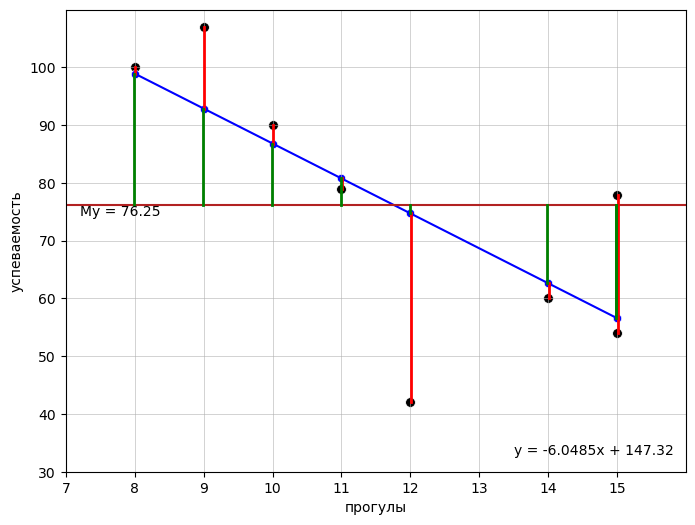

In [54]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='X', y='Y', color='black', s=50)
sns.lineplot(x=df.X, y=y_pred, color ='b')
sns.scatterplot(x=df.X, y=y_pred, color ='b')
plt.text(13.5, 33, f'y = {b:.4f}x + {a:.2f}')

plt.axhline(y=My, color='firebrick')
plt.text(7.2, My-2, f'{My = }')

for x, y1, y2 in zip(df.X, df.Y, y_pred):
    ymin = 1 - (110 - min(y1,y2))/80
    ymax = 1 - (110 - max(y1,y2))/80
    plt.axvline(x=x+0.01, ymin=ymin, ymax=ymax, color='r', lw=2)
    
    ymin = 1 - (110 - min(My,y2))/80
    ymax = 1 - (110 - max(My,y2))/80
    plt.axvline(x=x-0.01, ymin=ymin, ymax=ymax, color='g', lw=2)
    
plt.xlim([7,16])
plt.xticks(ticks=np.arange(7, 16))
plt.ylim([30,110])
plt.yticks(ticks=np.arange(30, 110, 10))
plt.xlabel('прогулы')
plt.ylabel('успеваемость')
plt.grid(linewidth=0.4);

На графике:
* зеленые отрезки $y(x_i) - \bar{y}$ – это часть вариации, объяснённая уравнением регрессии
* красные отрезки $\epsilon_i = y_i - y(x_i)$ – это  остаточная часть вариации, которая уравнением НЕ объяснена

In [56]:
Ri2 = sum((y_pred - My)**2)/sum((df.Y-My)**2)
Ri2

0.5174025426948514

В рамках построенной модели успеваемость на 51,74% зависит от количества прогулов. Оставшаяся часть вариации успеваемости (48,26%) обусловлена другими причинами.

#### <font color = SteelBlue size = 3> <b>Индекс корреляции</b></font>

Для качественной оценки тесноты связи используют **индекс корреляции**:\
$R_I = \sqrt{R_I^2}$ – квадратный корень из индекса детерминации.

Индекс корреляции тоже изменяется в пределах $0 \leq R_I \leq 1$ и для оценки качества модели используют шкалу Чеддока:

| Диапазон значений $R_I$ | Корреляционная зависимость $Y$ от X |
| --- | :--- |
| 0 - 0.1   | практически отсутствует |
| 0.1 - 0.3 | слабая |
| 0.3 - 0.5 | умеренная |
| 0.5 - 0.7 | заметная |
| 0.7 - 0.9 | сильная |
| 0.9 - 0.99 | очень сильная |
| 0.99 - 1 | практически функциональная |

In [57]:
Ri = np.sqrt(Ri2)
Ri

0.7193069877978744

Существует сильная корреляционная зависимость $Y$ – суммарной успеваемости от $X$ – количества прогулов.
Результат совпал по модулю с линейным коэффициентом корреляции $r=-0.72$, который мы получили в ходе решения.

Индекс корреляции не отражает направление зависимости (прямая или обратная). Но зато он годится для оценки качества как линейной, так и нелинейной регрессии – рАвно, как и индекс детерминации, вычисленный по рассмотренной выше методике.

Индекс детерминации и индекс корреляции – это частный случай [эмпирического коэффициента детерминации и эмпирического корреляционного отношения](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/St_08_Grouping%20data.%20Correlation%20analysis.ipynb) соответственно.

***
### <font color = MediumBlue size = 4><b>Оценка значимости регрессионной модели</b></font>

#### <font color = SteelBlue size = 3> <b>Выборочный индекс детерминации</b></font>

Проверка значимости выборочного уравнения регрессии эквивалентна проверке значимости выборочного индекса детерминации.

На уровне значимости $\alpha=0.05$ проверим нулевую гипотезу о том, что генеральный индекс детерминации равен нулю $H_0: R^2=0$. \
Против конкурирующей гипотезы о том, что такое влияние есть $H_1: R^2>0$.

Для проверки гипотезы используем статистический критерий: \
$F = \cfrac{Q_R}{Q_e} \cdot \cfrac{n-m-1}{m}$, где \
$Q_R = \sum{(y(x_i)-\bar{y})^2}$ – выборочная факторная сумма квадратов, \
$Q_e = \sum(y_i - y(x_i))^2$ – выборочная остаточная сумма квадратов, \
$m$ – количество факторных (причинных) переменных.

Эта случайная величина имеет распределение Фишера (F-распределение) с количеством степеней свободы $k_1 = m$, $k_2 = n-m-1$.

Если $F_н > F_к$, то гипотезу $H_0$ на уровне значимости $\alpha$ отвергаем.\
Если $F_н < F_к$, то отвергать гипотезу $H_0$ оснований нет.

In [58]:
alpha = 0.05
m = 1
k1 = m
k2 = n-m-1

# правосторонняя критическая область
Fk = stats.f.ppf(1-alpha, k1, k2)
print(f'{Fk = }')

Fn = sum((y_pred-My)**2)/sum((df.Y-y_pred)**2) * (n-m-1)/m
print(f'{Fn = }')

print(f'H0: R = 0 is {Fn<Fk}')
print (f'{R = }')

Fk = 5.987377607273699
Fn = 6.432721949063589
H0: R = 0 is False
R = 0.5174025426948514


Таким образом, на уровне значимости $\alpha=0.05$ гипотезу $H_0: R^2=0$ отвергаем в пользу конкурирующей гипотезы $H_1: R^2>0$.

**Вывод**: выборочный индекс детерминации $R^2 = 0.5174$ статистически значимо отличается от нуля, следовательно, статистически значимо и выборочное уравнение $y = 147.32 - 6.0485x$.

#### <font color = SteelBlue size = 3> <b>Средняя ошибка аппроксимации</b></font>

**Средняя ошибка аппроксимации** показывает, на сколько процентов в среднем эмпирические значения $y_i$ отличаются от соответствующих значений $y(x_i)$, вычисленных по уравнению регрессии.

$\bar{A} = \cfrac{1}{n} \sum{\left|\cfrac{y_i - y(x_i)}{y_i}\right|} \cdot 100\%$

Чем меньше средняя ошибка аппроксимации $\bar{A}$, тем лучше. \
Хорошим результатом считаются значения ниже 8-10%. 

In [59]:
A = sum(abs((df.Y-y_pred)/df.Y)) / n * 100
A

16.82922864389863

Эмпирические $y_i$ и соответствующие регрессионные значения $y(x_i)$ различаются в среднем на 16,83%. \
**Вывод**: качество модели удовлетворительно.